## An unusual village

The inhabitants of Normlösa, a small village in the fertile plains of eastern Sweden, are infamous not only for
their unscrupulous behavior but also because the males in the village are exceptionally short and stocky,
while the female villagers tend to be tall and lean. Geneticists from nearby Linköping University have so far
failed to come up with a credible explanation of this remarkable tendency.

Write a Python function to generate the height and weight of a random inhabitant of Normlösa. Use the
following process:

first, randomly select the gender of the villager; the proportion of males in this village is about 40%

then draw random numbers from a Gaussian distribution (normal distribution) for the height and weight of
the person; for this, you might use the NumPy function np.random.normal(loc, scale).
where loc is the and scale the standard deviation.

for males, the mean height is 140 and the height standard deviation is 15; the mean weight is 90 and
the weight standard deviation is 10;

for females, the mean height is 195 and the height standard deviation is 10; the mean weight is 60
and the weight standard deviation is 5.

Generate a dataset consisting of height–weight pairs for 50 Normlösa inhabitants. Make a scatterplot of the
height–weight data.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt  # basic plotting library
import seaborn as sns  # additional plotting functions
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
def generateVillageData(p_male):
    data = []
    for i in range(50):
        if (np.random.random() < p_male):
            hight_male = np.random.normal(loc=140, scale=15, size=1);
            weight_male = np.random.normal(loc=90, scale=10, size=1);
            data.append({'height': hight_male, 'weight': weight_male, 'gender': 'M'})
        else:
            hight_female = np.random.normal(loc=195, scale=10, size=1);
            weight_female = np.random.normal(loc=60, scale=5, size=1);
            data.append({'height': hight_female, 'weight': weight_female, 'gender': 'F'})
    return data


village_data = generateVillageData(0.4)
df = pd.DataFrame(village_data)
print(df.head())

                 height               weight gender
0   [165.2574696285979]   [92.4065182009705]      M
1   [190.7446515216798]  [61.35330967046493]      F
2   [196.9793533108163]  [56.11285952171834]      F
3  [108.80013268259277]  [96.24363333122149]      M
4  [181.92970714979995]  [61.66033527439865]      F


Here in the graph it shows that gender distribution based on height and weight ratio.
The left-upper dots are male distribution (short and stocky) and right lower one female distribution (tall and lean).

Text(0, 0.5, 'Weight')

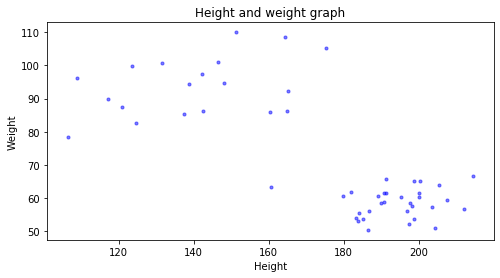

In [5]:
plt.figure(figsize=(8, 4));
colors = (0, 0, 0)
area = np.pi * 3
plt.scatter(df['height'], df['weight'], s=area, color=['blue'], alpha=0.5)
plt.title('Height and weight graph');
plt.xlabel("Height")
plt.ylabel("Weight")

In [6]:
#The KDE plot with  female and male density.
plt.figure(figsize=(12, 4));
ax1 = plt.subplot(121, sharey=ax1);
plt.title('Height and weight graph with kde');
sns.kdeplot(df['height'], df['weight'], shade=True);

#The KDE plot with green colour female and red is male.

ax2 = plt.subplot(122, sharey=ax1);
men = df[df['gender'] == 'M'];
women = df[df['gender'] == 'F']
sns.kdeplot(men['height'], men['weight'], cmap='Reds')
sns.kdeplot(women['height'], women['weight'], cmap='Greens');
plt.title('Height and weight graph with spiral colour');


#The correlation coeeficient for the data with height is negative
print('data correlation for height and weight',stats.pearsonr(df['height'], df['weight']))

NameError: name 'ax1' is not defined

<Figure size 864x288 with 0 Axes>

In [ ]:
#2nd approad with choice

gender_category = ['M', 'F']
gender_probs = [0.4, 0.6]
def generate_dataset():
    gender = np.random.choice(gender_category, p=gender_probs)
    if gender == 'M':
        height= np.random.normal(loc=140, scale=15, size=1);
        weight = np.random.normal(loc=90, scale=10, size=1);
        gender = 'M'
    else:
        height = np.random.normal(loc=195, scale=10, size=1);
        weight = np.random.normal(loc=60, scale=5, size=1);
        gender = 'F'
    return [height,weight,gender]

samples = pd.DataFrame([generate_dataset() for _ in range(50)],
                  columns=['height','weight','gender']).rename_axis('id', axis=0)

plt.figure(figsize=(15, 4));
ax1 = plt.subplot(121);
#The KDE plot with  female and male density.
plt.title('Height and weight graph with kde');
sns.kdeplot(samples['height'], samples['weight'], shade=True);

#The KDE plot with green colour female and red is male.

ax2 = plt.subplot(122, sharey=ax1);
men = samples[samples['gender'] == 'M'];
women = samples[samples['gender'] == 'F']
sns.kdeplot(men['height'], men['weight'], cmap='Reds')
sns.kdeplot(women['height'], women['weight'], cmap='Greens');
plt.title('Height and weight graph with spiral colour');


Let's pretend for a moment that you have been given the datapoints (the list of height–weight pairs) but you
have no information about how they were generated. Could you think of a way to reconstruct the parameters
you used in the code previously? For example, that the proportion of males is 40%, that the mean weight of
a female is 60 kilograms, etc. (NB: this question should be easy if you have taken the course Introduction to
data science. As an optional task, you may write code to reconstruct these parameters using the methods
presented there. If you haven't taken that course, and have no idea how to answer the question, please
discuss with the lab instructor.)

Formally, these data points are generated using a Gaussian mixture model. We will come back to this
model and study it more extensively in later lectures.

Here i have generated the data set with given mean (height and weight) without giving the category of female and male.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

def generateData(p_male):
    data = []
    for i in range(50):
        if (np.random.random() < p_male):
            hight= np.random.normal(loc=140, scale=15, size=1);
            weight = np.random.normal(loc=90, scale=10, size=1);
            data.append({'height': hight, 'weight': weight})
        else:
            hight = np.random.normal(loc=195, scale=10, size=1);
            weight = np.random.normal(loc=60, scale=5, size=1);
            data.append({'height': hight, 'weight': weight})
    return data


village_data = generateData(0.4)



In [ ]:
dataframe = pd.DataFrame(village_data)
plt.scatter(dataframe['height'], dataframe['weight'])
plt.title('Height and weight graph without custer');
plt.xlabel("Height")
plt.ylabel("Weight")

First i need to find the number of cluster possible in given data set.With visual alson we can see that
there is two clear cluster possible in the given graph.

Similarly i am verifying this using kmean algorithm.
Determine the number of cluster possible in given data set using elbow method which provide

In [ ]:
#2nd approad with choice

gender_category = ['M', 'F']
gender_probs = [0.4, 0.6]
def generate_dataset():
    gender = np.random.choice(gender_category, p=gender_probs)
    if gender == 'M':
        height= np.random.normal(loc=140, scale=15, size=1);
        weight = np.random.normal(loc=90, scale=10, size=1);
        gender = 'M'
    else:
        height = np.random.normal(loc=195, scale=10, size=1);
        weight = np.random.normal(loc=60, scale=5, size=1);
        gender = 'F'
    return [height,weight,gender]

samples = pd.DataFrame([generate_dataset() for _ in range(50)],
                  columns=['height','weight','gender']).rename_axis('id', axis=0)

samples.head(50)

In [ ]:
plt.figure(figsize=(15, 4));
ax1 = plt.subplot(121);
#The KDE plot with  female and male density.
plt.title('Height and weight graph with kde');
sns.kdeplot(samples['height'], samples['weight'], shade=True);

#The KDE plot with green colour female and red is male.

ax2 = plt.subplot(122, sharey=ax1);
men = samples[samples['gender'] == 'M'];
women = samples[samples['gender'] == 'F']
sns.kdeplot(men['height'], men['weight'], cmap='Reds')
sns.kdeplot(women['height'], women['weight'], cmap='Greens');
plt.title('Height and weight graph with spiral colour');

In [ ]:
for i in range(2):
    print(i)
    ax = plt.subplots();
    if i==0:
        men = samples[samples['gender'] == 'M'];
        sns.kdeplot(men['height'], men['weight'], cmap='Reds')
    if i==1:
        women = samples[samples['gender'] == 'F']
        sns.kdeplot(women['height'], women['weight'], cmap='Greens');
    plt.title('Height and weight graph  colour');

In [ ]:
cmaps = ['Reds', 'Blues', 'Greens', 'Greys']

np.random.seed(0)
for i, cmap in enumerate(cmaps):
    offset = 3 * i
    x = np.random.normal(offset, size=100)
    y = np.random.normal(offset, size=100)
    label = 'Offset {}'.format(offset)
    sns.kdeplot(x, y, cmap=cmaps[i]+'_d', label=label)
plt.title('Normal distributions with offsets')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

def generateData(p_male):
    data = []
    for i in range(50):
        if (np.random.random() < p_male):
            hight= np.random.normal(loc=140, scale=15, size=1);
            weight = np.random.normal(loc=90, scale=10, size=1);
            data.append({'height': hight, 'weight': weight})
        else:
            hight = np.random.normal(loc=195, scale=10, size=1);
            weight = np.random.normal(loc=60, scale=5, size=1);
            data.append({'height': hight, 'weight': weight})
    return data


village_data = generateData(0.4)

In [ ]:
dataframe = pd.DataFrame(village_data)

plt.scatter(dataframe['height'], dataframe['weight'])
plt.title('Height and weight graph without custer');
plt.xlabel("Height")
plt.ylabel("Weight")

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10, random_state=0).fit(dataframe)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
pred_y = kmeans.fit_predict(dataframe)
print(kmeans.cluster_centers_[:, 0])
print(kmeans.cluster_centers_[:, 1])
plt.scatter(dataframe['height'], dataframe['weight'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
pred_y = kmeans.fit_predict(dataframe)
female_male_mean_height=[195,140]
female_male_mean_weight=[60,90]
plt.scatter(dataframe['height'], dataframe['weight'])
plt.scatter(female_male_mean_height, female_male_mean_weight, s=50, c='red')
